# FCS Lab 3 - MD5, Rainbow Tables

* Name(s): Tan Li Yuan, Teo Yew Xuan
* Student ID(s): 1004326, 1004452

## Part I: Hashing Using MD5

* How does the length of the hash correspond to the input string?

The length of the hash remains the same regardless of the length of the input string

* Are there any visible correlations between the hash and the input string?

The are no visible correlations.

* What are the issues related to the cryptographic weakness of MD5?

MD5 is susceptible to message collision or length extension attack 
For collision attacks, it requires O(2^(128/2)) possibilities to find an input that hashes to the same output--> birthday attack, this leads to collision resistance being affected.
Another vulnerability would be the length extension attack, where the attacker can reuse the hash: x = H(k,m'), if and only if H(m) = H(m').
                                             MD5 is susceptible to message collision or length extension attack 
For collision attacks, it requires O(2^(128/2)) possibilities to find an input that hashes to the same output--> birthday attack, this leads to collision resistance being affected.
Another vulnerability would be the length extension attack, where the attacker can reuse the hash: x = H(k,m'), if and only if H(m) = H(m').
                                             

In [1]:
!echo -n "hi" | md5sum >> hash_gen.txt
!echo -n "i'm" | md5sum >> hash_gen.txt
!echo -n "a" | md5sum >> hash_gen.txt
!echo -n "student" | md5sum >> hash_gen.txt
!echo -n "from" | md5sum >> hash_gen.txt
!echo -n "sutd" | md5sum >> hash_gen.txt

!cat hash_gen.txt

49f68a5c8493ec2c0bf489821c21fc3b  -
8972508ac708441f98248fa5a39182e9  -
0cc175b9c0f1b6a831c399e269772661  -
cd73502828457d15655bbd7a63fb0bc8  -
d98a07f84921b24ee30f86fd8cd85c3c  -
e7d56dae820877e12f852a4166474ef7  -


## Part II: Break Hashes with Brute Force

In [2]:
!python3 ex2.py
!cat ex2_hash.txt

aseas is ddaafa5d551a582bc924d09cc8d33ee5
Remaining length:  14
cance is 96f6065d8f2dd1376eff88fba65d1d83
Remaining length:  13
di5gv is 836626589007d7dd5304c8d22815fffc
Remaining length:  12
dsmto is a74edf83748e3c4fa5f31ec10bad79db
Remaining length:  11
egunb is 1b31905c59f481958d2eb72158c27ac7
Remaining length:  10
hed4e is a8218c67a5b4e652e30a59372e07df59
Remaining length:  9
lou0g is 81466b6bb4be5a48e2230be1338bcde6
Remaining length:  8
mlhdi is 6e313b70d12de950443527a33d802b76
Remaining length:  7
nized is 78c1b8edd1bc3ffc438432479289a9e1
Remaining length:  6
ofror is de952f5454fb0ee79bca249f80e9fe8f
Remaining length:  5
opmen is a92b66a9802704ca8616c4b092378272
Remaining length:  4
owso9 is 644674d142ba2174a80889f833b32563
Remaining length:  3
sso55 is 1b4baba3ae3be69857b323cf6b7fcd80
Remaining length:  2
tpoin is 0d5b558d5f6744deaaf5b016c6c77a57
Remaining length:  1
tthel is d4efdba5e9725e77c9b9051fa8136f0a
Remaining length:  0
Total time taken(s): 51.319883333
Average time tak

* How much time did you take in total?

51.319883333 secs

* How much time does it take to crack each string, on average?

3.4213255555333335 secs

* Is it possible to amortize (gradually write off the initial cost of) the brute forcing attempts?

In order to amortize the brute force attempt, knowledge on the password is required e.g. whether it is english/has a certain length or certain characters like alphabets only or alphabets and numbers. With this knowldege we can narrow down the possibilities of the brute force attack without testing all possible ASCII character. 

## Part III: Creating Rainbow Tables

* Is rcrack faster/slower than your script ex2.py? By how much faster/slower is it?

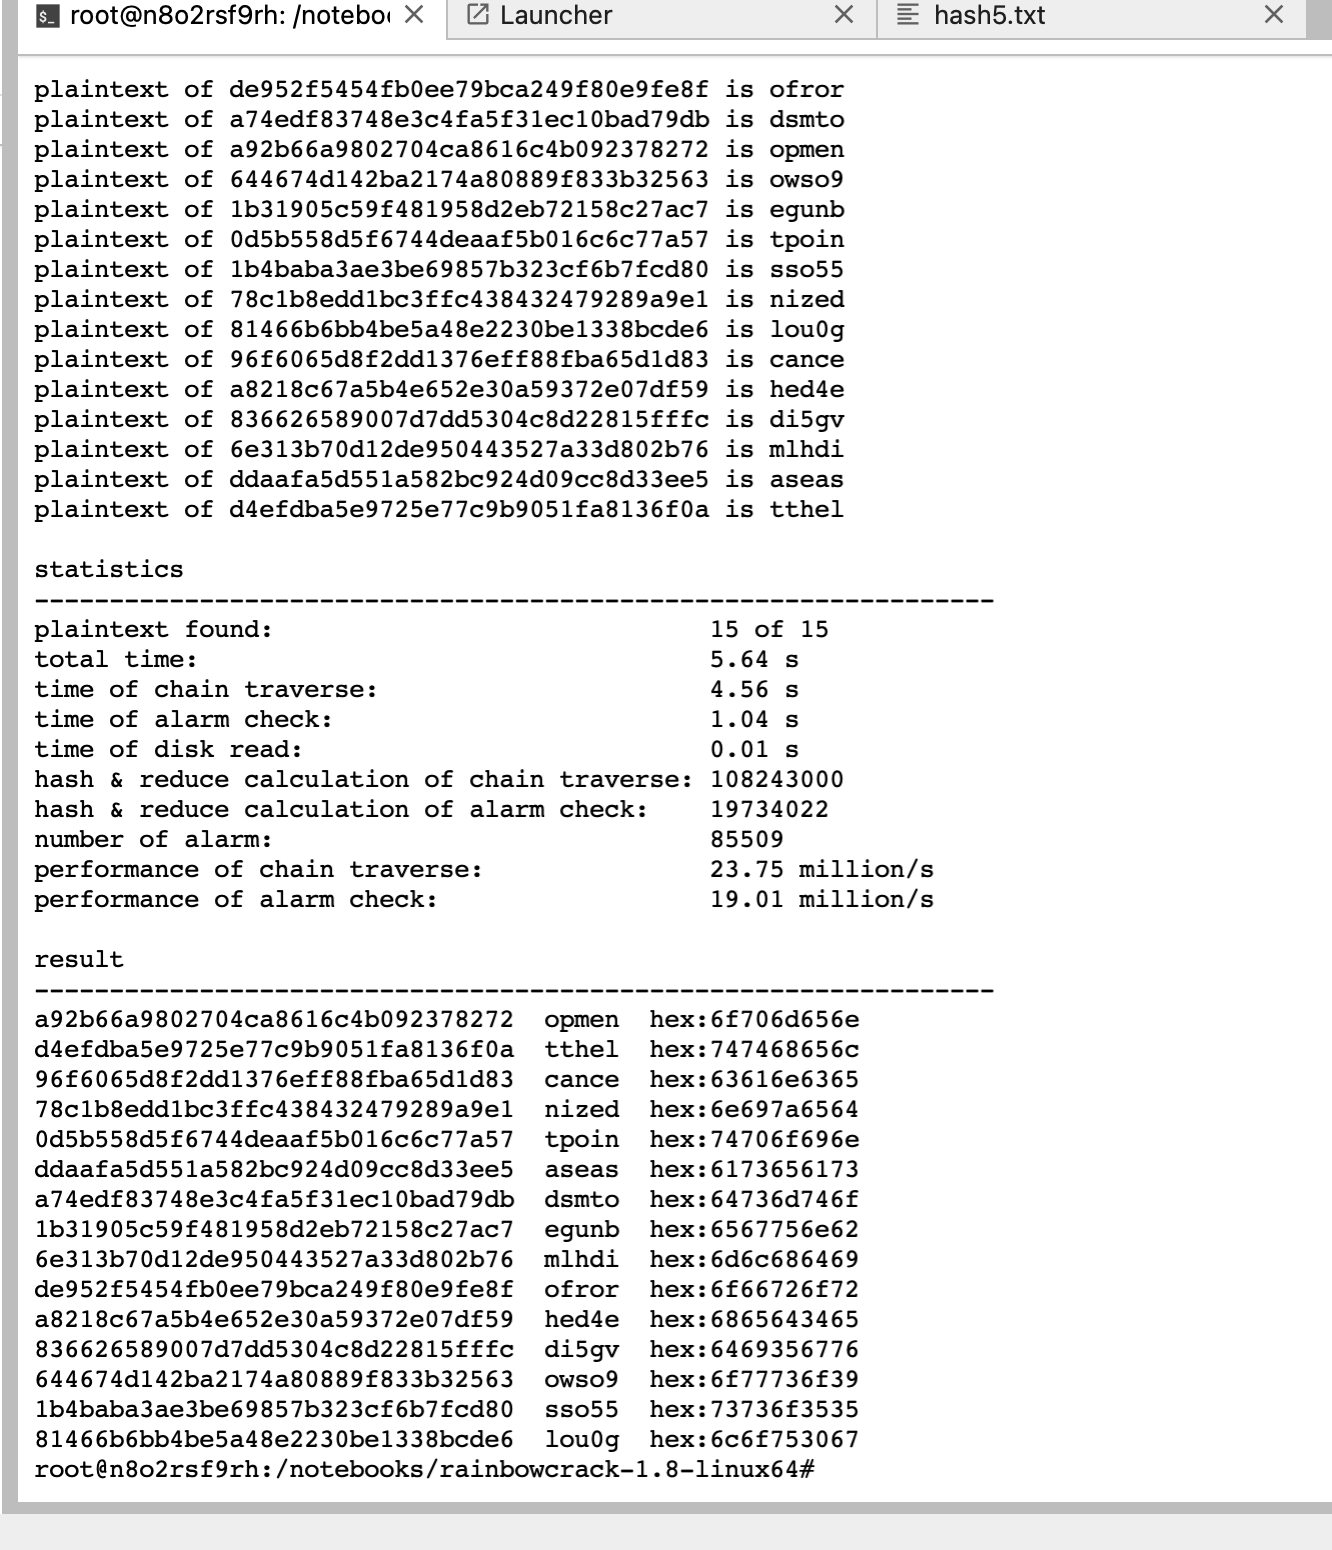

In [3]:
from IPython.display import Image
Image(filename='rainbowcrack/unsalted_rainbowcrack_image.png') 

In [20]:
!cd rainbowcrack
!rtgen md5 loweralpha-numeric 1 5 0 3800 33554432 0

/bin/sh: rtgen: command not found


rcrack is faster than script ex2.py.

* Do you observe any advantages or disadvantages of using rainbowcrack?

rainbowcrack is faster by a lot in terms of the time required to crack hashcodes. However upon salting the plaintext, certain strings could not be found.

## Part IV: Salt

* What is the observed differences between your ease of cracking the salted vs the unsalted plaintexts?

The salted plaintexts gets harder to crack as compared to the unsalted plaintext. For the first sample salted6.txt, rainbowcrack was able to guess 9/15 entries correctly while for a second sample called salted6_ly.txt, rainbowcrack correctly guessed 7 plaintext. Therefore we can deduce that the accuracy of rainbow crack fluctuates.

In [4]:
!python3 ex4.py
!cat salted6.txt

Traceback (most recent call last):
  File "/Users/yuanhawk/Downloads/lab3/ex4.py", line 16, in <module>
    read_salt_hash_file('ex2_hash.txt')
  File "/Users/yuanhawk/Downloads/lab3/ex4.py", line 11, in read_salt_hash_file
    strs = l.strip() + str_generator(size=1, chars=string.ascii_lowercase)
NameError: name 'str_generator' is not defined
f9b93c50accbc1137abe1fd25db7276c
fa0efa4970632e54261ab2cd0c83f85e
bcd8d08cfe9c57ecc5b9fd4b45d8be77
b985f7ceaed1db4a67755291c44b0c35
af4183617bd0299136fdb9ecd5d164cf
ff5720901b09013b03f27cbbe896f437
92197999d44efb24d5e84648d5fe13b2
fe0047aaa65779e68681c1141fde6d35
e5bc0f4c49eb513e4e6a8fa7620c2634
25eb9a343e523af07a2404b314034623
4cefeb578763ff1afb89117441b9c7bc
70fbc3b121d33def05bf7ffcaa1991f1
efd6ee0bcb63b4556211b4789b67cf9f
0b633d02daddf5a7ab2a2c5e17b47872
b2ef89ae4da989f8411ac4f1158ef9d3

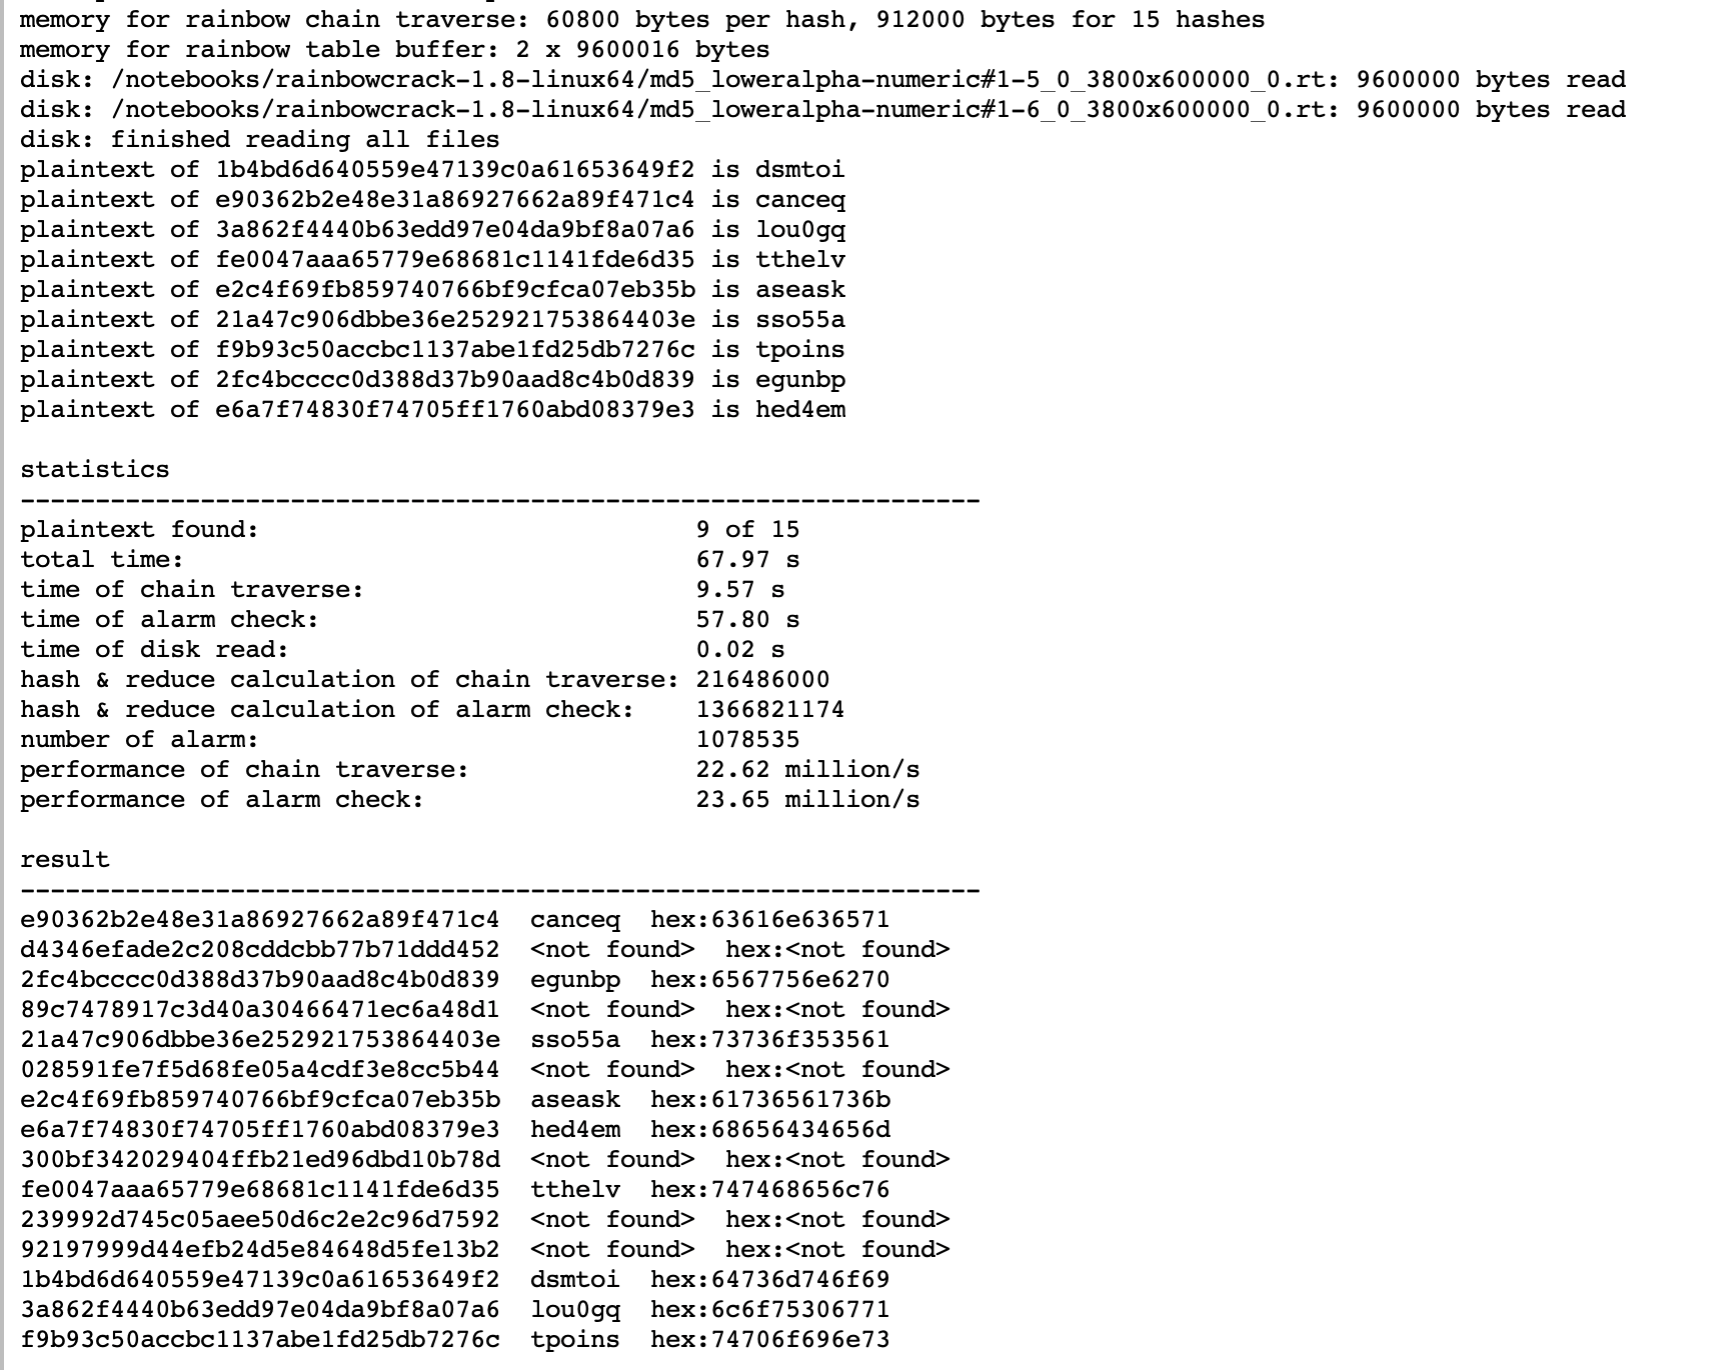

In [5]:
from IPython.display import Image
Image(filename='rainbowcrack/salted_rainbow_crack_image.png')

* Report the difference in time observed to crack.

salted:67.97 s
unsalted: 5.64s

* Explain any differences between salted and non salted rcrack strategies.

By adding a random value salt prior to the plaintext, the encoded value becomes probabilistic and it renders rainbow attack to be ineffective and brute force method will ensure the possibilities of the salt being added to the hash are also accounted for.
Unsalted can be attack by using dictionary attack, hashtable attack or rainbowcrack in this case. It will run through the hash algorithm  many times and as long as the hash can be found in the chain of hashes produced by the rainbowcrack, the hash value can be found easily.

## Part V: Hash Breaking Competition

* What is the approach you used to crack the hashes

We utilised a common list of words from crackstation (https://crackstation.net/crackstation-wordlist-password-cracking-dictionary.htm) to generate a dictionary attack to crack the hashes due to the ease of breaking hashes within a short period of time with lower computation power. Previously we have managed to brute force to the 6th character but we forgot to save the output thanks to crackstation failing the github.

* How you decided or designed your approach

When testing with brute forcing for 5 characters it took several hours and after testing for 6 characters it will take more than one day to crack in which we decided to give up on because our computers were taking off.

* Main challenges and limitations of your approach

Brute force attempts are not recommended on MAC intel/MAC M1 which would perform better on GPUs. The challenge was writing an optimized brute force script that is light on the machine. There is a randomised characters brute force, iterative brute force just by changing the array index. We knew about itertools, hashcat, jacktheripper but a better design choice would be building our own code that would be more aligned with the learning objectives of lab 3.

* How many hashes did you manage to crack?

79 hashes

In [6]:
#!python3 ex5.py (Run after installing crack station db:(https://crackstation.net/crackstation-wordlist-password-cracking-dictionary.htm)
!cat ex5.csv

In [7]:
!cat output_5.txt

{}
@@@@@@@@@@@ is 4060e28193d36aeb17dff58ecd2f4e1d
Remaining length:  147
Time taken:  0.134548709
123123 is 4297f44b13955235245b2497399d7a93
Remaining length:  146
Time taken:  43.074782500000005
12345 is 827ccb0eea8a706c4c34a16891f84e7b
Remaining length:  145
Time taken:  43.240560709
123456 is e10adc3949ba59abbe56e057f20f883e
Remaining length:  144
Time taken:  43.246135125
1a2b3c4d is 1897a69ef451f0991bb85c6e7c35aa31
Remaining length:  143
Time taken:  75.2266435
2011992 is 41fb027d1c23536f9e0b2dde019e1a37
Remaining length:  142
Time taken:  100.597474334
3.1415926535 is cf9335aa407b76812d6fe661de163756
Remaining length:  141
Time taken:  156.81414125
4ever&ever is 6cd1e21cf8e989f9fc662c40b0d80294
Remaining length:  140
Time taken:  231.045872959
59873523 is 52b2d1ad30dc855e46a484abb180d325
Remaining length:  139
Time taken:  276.517415959
5f4dcc3b5aa765d61d8327deb882cf99 is 696d29e0940a4957748fe3fc9efd22a3
Remaining length:  138
Time taken:  286.359438042
98765 is c37bf859faf39280